In [ ]:
import pandas as pd

df = pd.read_csv('data/final_matches.csv')

In [ ]:
df.describe()

In [ ]:
df.describe(include='str') 

In [ ]:
# df_referee = df[['referee']].drop_duplicates()

# df_referee.loc[:,'win_local'] = df_referee['referee'].apply(lambda x: df[(df['referee']==x) & (df['result']=='W')].shape[0])
# df_referee.loc[:,'loses_local'] = df_referee['referee'].apply(lambda x: df[(df['referee']==x) & (df['result']=='L')].shape[0])
# df_referee.loc[:,'draw'] = df_referee['referee'].apply(lambda x: df[(df['referee']==x) & (df['result']=='D')].shape[0])

# df_referee.loc[:,'total_matchs'] = df_referee['win_local']+df_referee['loses_local']+df_referee['draw']

In [ ]:
df_referee = df.groupby(['referee', 'result']).size().unstack(fill_value=0)
df_referee = df_referee.rename(columns={'W': 'win_local', 'L': 'loses_local','D':'draw'})
df_referee.loc[:,'total_matchs'] = df_referee['win_local']+df_referee['loses_local']+df_referee['draw']

In [70]:
df_referee.sort_values(by='total_matchs', ascending=False).head()

result,draw,loses_local,win_local,total_matchs
referee,,,,
Anthony Taylor,82,103,103,288
Michael Oliver,50,109,109,268
Craig Pawson,50,86,86,222
Simon Hooper,52,79,79,210
Stuart Attwell,40,84,84,208


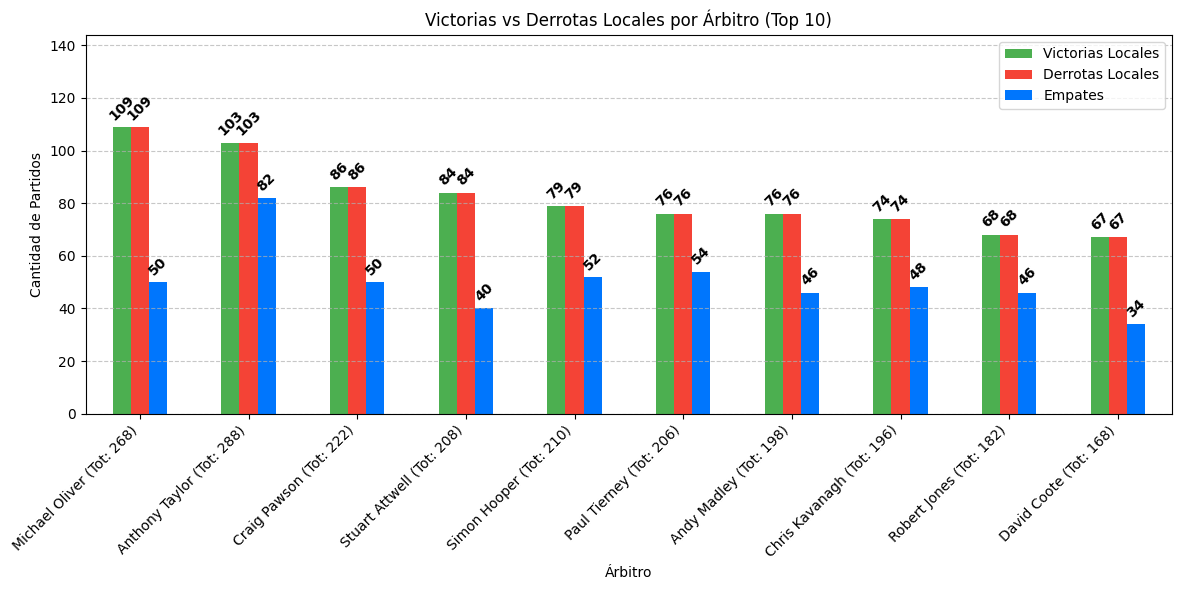

In [122]:
import matplotlib.pyplot as plt

# Ordenar y filtrar para que la gráfica sea legible
top_referees = df_referee.sort_values(by='win_local', ascending=False).head(10)

# Total de partidos dirigidos
referee_total = [f"{ref} (Tot: {tot})" for ref, tot in zip(top_referees.index, top_referees['total_matchs'])]


# Crear la gráfica
ax = top_referees[['win_local', 'loses_local','draw']].plot(kind='bar', figsize=(12, 6),color=['#4CAF50', '#F44336',"#0076FD"])


for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold',rotation=45)
    
# asignar nuevo la etiqueta con el total de partidos dirigidos
ax.set_xticklabels(referee_total, rotation=45, ha='right')

plt.title('Victorias vs Derrotas Locales por Árbitro (Top 10)')
plt.xlabel('Árbitro')
plt.ylabel('Cantidad de Partidos')
plt.xticks(rotation=45)
plt.legend(['Victorias Locales', 'Derrotas Locales','Empates'])
ax.set_ylim(0, top_referees.values.max() /2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [59]:
team_goals = df[['team']].drop_duplicates()
team_goals.loc[:,'goals_at_home'] = team_goals['team'].apply(lambda x : df[df['team']==x]['gf'].sum())
team_goals.loc[:,'goals_as_visitor'] = team_goals['team'].apply(lambda x : df[df['opponent']==x]['ga'].sum())
team_goals.loc[:,'goals_total'] = team_goals['goals_at_home']+team_goals['goals_as_visitor']


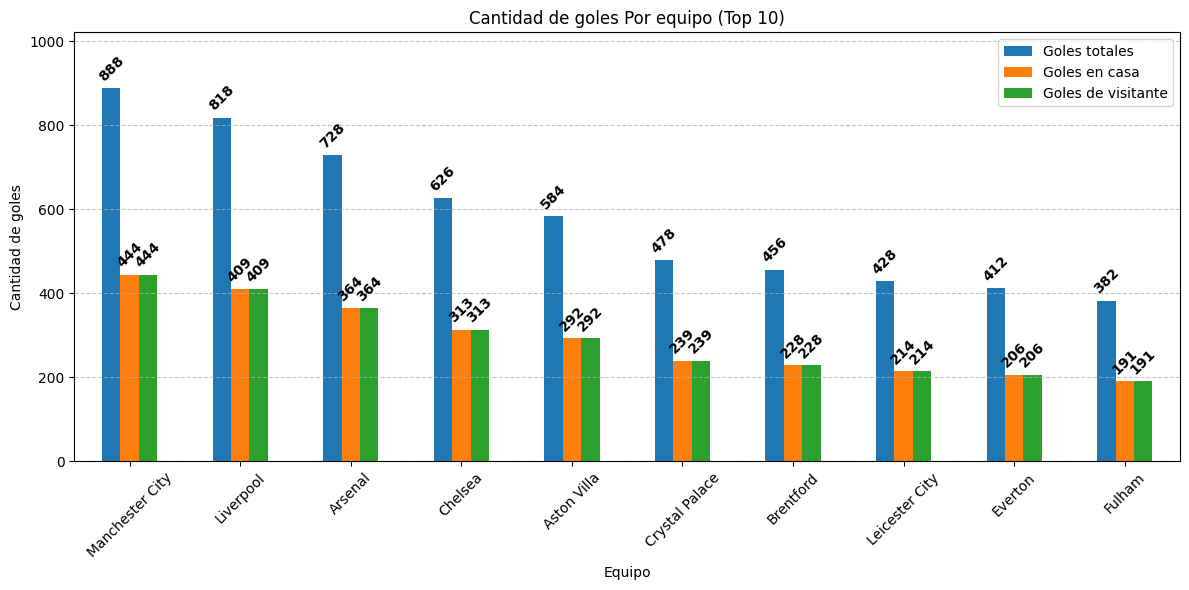

In [141]:
top_team_score = team_goals.sort_values(by='goals_total', ascending=False).head(10)

ax = top_team_score.set_index('team')[['goals_total','goals_at_home', 'goals_as_visitor']].plot(kind='bar', figsize=(12, 6))


for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold',rotation=45)

plt.title('Cantidad de goles Por equipo (Top 10)')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de goles')
plt.xticks(rotation=45)
plt.legend(['Goles totales', 'Goles en casa','Goles de visitante'])
ax.set_ylim(0, top_team_score['goals_total'].max() *1.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

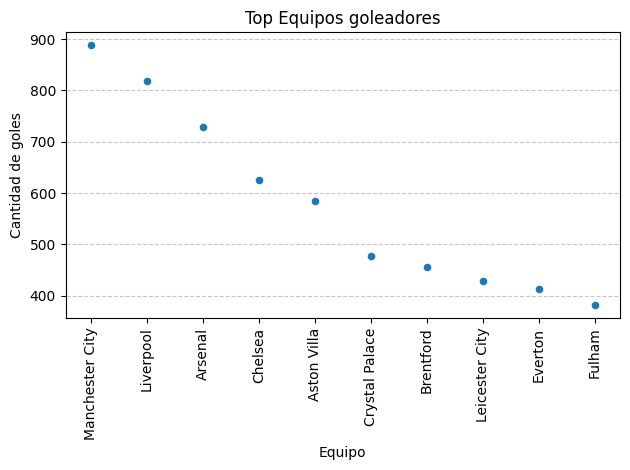

In [150]:
team_goals.sort_values(by='goals_total',ascending=False).head(10).plot.scatter(x='team',y='goals_total')

plt.title('Top Equipos goleadores')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de goles')
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [158]:
df[(df['team']=='Liverpool') & (df['season']==2025)]['gf'].sum()

np.int64(86)